# Feed-forward Neural Networks
### From scratch

## Imports

In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

## 1. Forward step

$ \large n_{oi} = w_{oi} x_i + b_i $  

$ \large a_{oi} = \tanh(n_{oi}) $   

$ \large n_{hi} = w_{hi} a_{oi} + b_i $  

$ \large yi = \exp(n_hi) $   

$ \large y_{ip} = \frac{y_i}{\sum_{j=1}^n{y_j}} $   




In [1]:
def ForwardStep(X, model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    n1 = X.dot(W1) + b1
    a1 = np.tanh(n1)
    n2 = a1.dot(W2) + b2
    y = np.exp(n2)
    py = y / np.sum(y, axis=1, keepdims=True)
    return py, a1

## 2. Backward step

### Output layer:  

$ \large d_o = y_{ip} $   

$ \large d_{ow} = a_o^t d_o $   

$ \large d_{ow} = \sum_{j=1}^n d_{oj} $   

$ \large w_{o}^{(i+1)} = w_{o}^{(i)} - m . d_{ow} + \lambda w_{oi} $  

$ \large b_{o}^{(i+1)} = b_{o}^{(i)} - m . d_{ob} $  

  
  
### Hidden layer:  

$ \large d_h = w_o d_o . (1 - a_h^2)$   

$ \large d_{hw} = x_i d_h $   

$ \large d_{hb} = \sum_{j=1}^n d_{hj} $   

$ \large w_{h}^{(i+1)} = w_{h}^{(i)} - m . d_{hw} + \lambda w_{hi} $  

$ \large b_{h}^{(i+1)} = b_{h}^{(i)} - m . d_{hb} $  

  

In [3]:
def BackwardStep(X, y, nExamples, py, a1, model, m, Lambda):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Output to hidden layer
    d2 = py
    d2[range(nExamples), y] -= 1
    dW2 = (a1.T).dot(d2)
    db2 = np.sum(d2, axis=0, keepdims=True)
 
    # Hidden layer
    d1 = d2.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(X.T, d1)
    db1 = np.sum(d1, axis=0)

    # Add regularization terms (only Ws)
    dW1 += Lambda * W1
    dW2 += Lambda * W2
  
    # Gradient descent parameter update
    W1 -= m * dW1
    b1 -= m * db1
    W2 -= m * dW2
    b2 -= m * db2
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return(model)

## 3. Loss function
$ \large l = \sum_{j+1}^n{[-\log(y_pj)]} + \lambda \frac{1}{2 \; (\sum_{j=1}^n {w_hj}^2 + \sum_{j=1}^n {w_oj}^2)}$

In [4]:
def CalcLoss(model, X, y, Lambda):
    nExamples = len(X) 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    py, a1 = ForwardStep(X, model)
    
    # Calculating the loss
    logPy = -np.log(py[range(nExamples), y])
    loss = np.sum(logPy)
    
    # Add regulatization to loss
    loss += Lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1. / (nExamples * loss)

## 4. Build the model

In [5]:
def BuildModel(X, y, nInp, nHid, nOut, epochs, m, Lambda, printLoss=False):
    
    # Initialize 
    nExamples = len(X)
    np.random.seed(0)
    W1 = np.random.randn(nInp, nHid) / np.sqrt(nInp)
    b1 = np.zeros((1, nHid))
    W2 = np.random.randn(nHid, nOut) / np.sqrt(nHid)
    b2 = np.zeros((1, nOut))
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
     
    # Train
    for i in range(0, epochs):

        py, a1 = ForwardStep(X, model)
        model = BackwardStep(X, y, nExamples, py, a1, model, m, Lambda)
        
        if printLoss and i % 1000 == 0: print("Loss after iteration %i: %f" % (i, CalcLoss(model, X, y, Lambda)))

    return model

## 5. Predict

In [6]:
def Predict(model, X):
    py, a1 = ForwardStep(X, model)
    return np.argmax(py, axis=1)

## Test


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


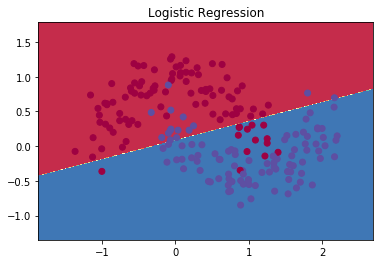

Loss after iteration 0: 0.000057
Loss after iteration 1000: 0.000282
Loss after iteration 2000: 0.000291
Loss after iteration 3000: 0.000293
Loss after iteration 4000: 0.000294
Loss after iteration 5000: 0.000294
Loss after iteration 6000: 0.000294
Loss after iteration 7000: 0.000294
Loss after iteration 8000: 0.000294
Loss after iteration 9000: 0.000294
Loss after iteration 10000: 0.000294
Loss after iteration 11000: 0.000294
Loss after iteration 12000: 0.000294
Loss after iteration 13000: 0.000294
Loss after iteration 14000: 0.000294
Loss after iteration 15000: 0.000294
Loss after iteration 16000: 0.000294
Loss after iteration 17000: 0.000294
Loss after iteration 18000: 0.000294
Loss after iteration 19000: 0.000294


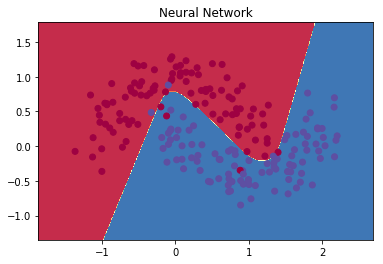

In [7]:
def plot_decision_boundary(predFunc, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predFunc(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Generate data
X, y = datasets.make_moons(200, noise=0.20)

# Logistic Regression
lr = linear_model.LogisticRegressionCV()
lr.fit(X, y)
plot_decision_boundary(lambda x: lr.predict(x), X, y)
plt.title("Logistic Regression")
plt.show()

# Neural Networks
nn = BuildModel(X=X, y=y, nInp=2, nHid=3, nOut=2, epochs=20000, m=0.01, Lambda=0.01, printLoss=True)
plot_decision_boundary(lambda x:Predict(nn,x), X, y)
plt.title("Neural Network")
plt.show()